Flow Of Project-
1 Import Data,
2 Proprocess Data,
3 Visualize Data,
4 Train test split,
5 Train Model and Avualivation,
6 Prediction System with Web app
Import Necessary Packages



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [ ]:
medical_df = pd.read_csv('insurance.csv')

In [ ]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


About the Data:-
age: age of the insured person (numeric),
sex: gender of the insured person (categorical: male/female),
bmi: body mass index of the insured person (numeric),
children: number of children covered by the insurance plan (numeric),
smoker: whether or not the insured person is a smoker (categorical: yes/no),
region: region where the insured person resides (categorical: northeast/northwest/southeast/southwest),
charges: the insurance charges/costs billed to the insured person (numeric)

Exploring Data & Analysing Data

In [ ]:
medical_df.shape

(1338, 7)

In [ ]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Data Visualisation

<Figure size 300x300 with 0 Axes>

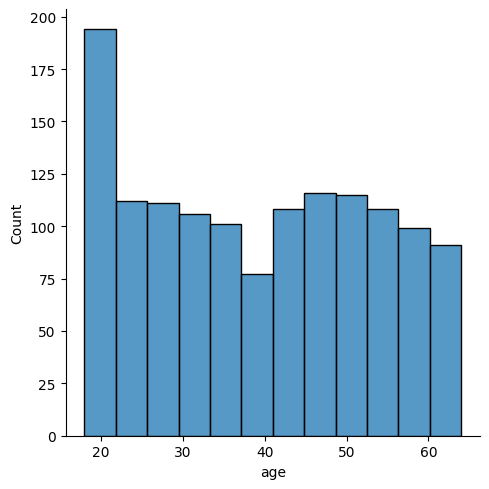

In [ ]:
plt.figure(figsize=(3,3))
sns.displot(data=medical_df,x='age')

<Figure size 300x300 with 0 Axes>

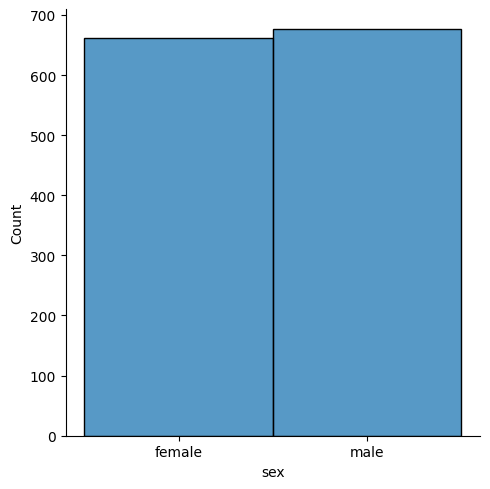

In [ ]:
plt.figure(figsize=(3,3))
sns.displot(data=medical_df,x='sex',kind='hist')

In [ ]:
medical_df['sex'].value_counts()

,count
sex,
male,676
female,662


In [ ]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<Figure size 400x400 with 0 Axes>

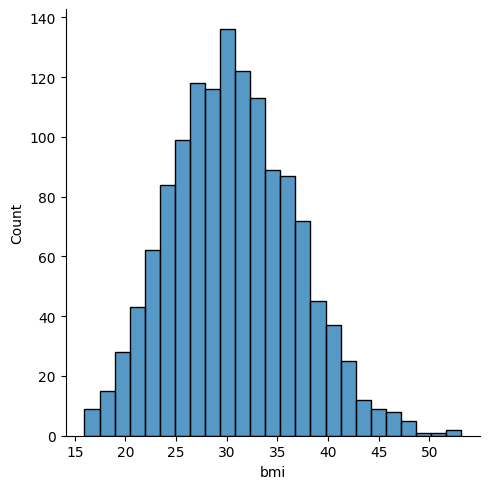

In [ ]:
plt.figure(figsize=(4,4))
sns.displot(data=medical_df,x='bmi')
plt.show()

In [ ]:
medical_df['bmi'].value_counts()

,count
bmi,
32.300,13
28.310,9
30.800,8
31.350,8
30.495,8
...,...
39.425,1
40.480,1
38.900,1


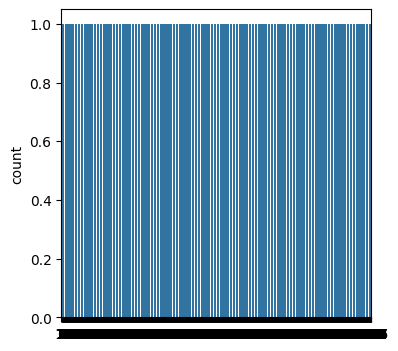

In [ ]:
plt.figure(figsize=(4,4))
sns.countplot(medical_df['children'])
plt.show()

In [ ]:
medical_df['children'].value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


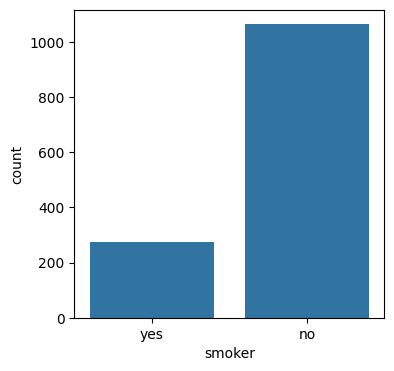

In [ ]:
plt.figure(figsize=(4,4))
sns.countplot(data=medical_df,x='smoker')
plt.show()

In [ ]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


convert categorical column to numerical

In [ ]:
medical_df['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


In [ ]:
medical_df.replace({'sex':{'male':0,'female':1}},inplace=True)
medical_df.replace({'smoker':{'yes':0,'no':1}},inplace=True)
medical_df.replace({'region':{'southeast':0,'southwest':1,'northwest':2,'northeast':3}},inplace=True)

/tmp/ipython-input-3958717934.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  medical_df.replace({'sex':{'male':0,'female':1}},inplace=True)
/tmp/ipython-input-3958717934.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  medical_df.replace({'smoker':{'yes':0,'no':1}},inplace=True)
/tmp/ipython-input-3958717934.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future beha

In [ ]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,2,21984.47061
4,32,0,28.880,0,1,2,3866.85520


Train Test Split

In [ ]:
X = medical_df.drop('charges',axis=1)
y = medical_df['charges']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(1070, 6)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# ----------------- 1. Data Loading and Preprocessing -----------------
# Load the dataset
df = pd.read_csv("insurance.csv")

# One-Hot Encoding for categorical variables: 'sex', 'smoker', 'region'
# 'drop_first=True' is used to avoid multicollinearity (the Dummy Variable Trap)
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

# Define features (X) and target (y)
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to evaluate and print results
def evaluate_model(y_true, y_pred, model_name):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"--- {model_name} Results ---")
    print(f"R-squared: {r2:.4f}")
    print(f"MAE (Mean Absolute Error): {mae:.2f}")
    print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
    return r2, mae, rmse


# ----------------- 2. Model Training and Hyperparameter Tuning -----------------

# Model 1: Linear Regression (Baseline Comparison)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
evaluate_model(y_test, y_pred_lr, "Linear Regression")

print("\n" + "="*70 + "\n")

# Model 2: Hyperparameter Tuned Random Forest Regressor (The BEST Model)
print("Starting Hyperparameter Optimization for Random Forest...")

# Parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300],        # Number of trees in the forest
    'max_depth': [None, 10, 20],            # Maximum number of levels in a tree
    'min_samples_split': [2, 5, 10],        # Minimum number of data points placed in a node before the node is split
    'min_samples_leaf': [1, 2, 4]           # Minimum number of data points allowed in a leaf node
}

# Initialize Random Forest and Randomized Search
rf = RandomForestRegressor(random_state=42)
rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=10,      # Number of different parameter combinations to try (for speed)
    cv=5,           # 5-fold cross-validation
    random_state=42,
    n_jobs=-1       # Use all available CPU cores
)

# Train the model (this includes the search)
rf_random.fit(X_train, y_train)

# Get the best estimator
best_rf = rf_random.best_estimator_

# Make predictions with the best model
y_pred_rf = best_rf.predict(X_test)

# Evaluate the final, best model
r2_rf, mae_rf, rmse_rf = evaluate_model(y_test, y_pred_rf, "Optimized Random Forest")

# Print the best parameters found
print("\nBest Hyperparameters Found:")
print(rf_random.best_params_)

print(f"\n✅ The best model for submission is the Optimized Random Forest with R-squared: {r2_rf:.4f}")

--- Linear Regression Results ---
R-squared: 0.7836
MAE (Mean Absolute Error): 4181.19
RMSE (Root Mean Squared Error): 5796.28


Starting Hyperparameter Optimization for Random Forest...
--- Optimized Random Forest Results ---
R-squared: 0.8775
MAE (Mean Absolute Error): 2468.15
RMSE (Root Mean Squared Error): 4361.19

Best Hyperparameters Found:
{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': None}

✅ The best model for submission is the Optimized Random Forest with R-squared: 0.8775


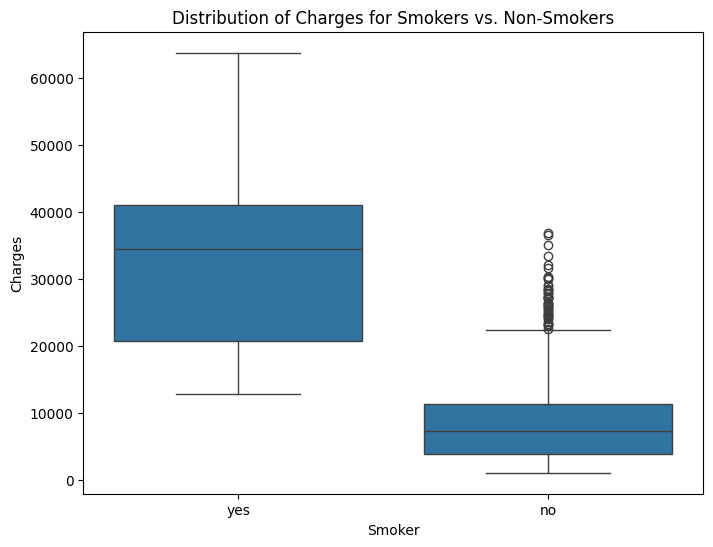

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Use the original df DataFrame for plotting with 'smoker' as 'yes'/'no'
plt.figure(figsize=(8, 6))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Distribution of Charges for Smokers vs. Non-Smokers')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()